In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
from gradient_loader import load_stacked_gradients, load_gradients_by_batch

# Configuration
GRADIENTS_DIR = "results/gradients"
EPOCH_TO_LOAD = 0

print(f"Loading gradients from: {GRADIENTS_DIR}")
print(f"Epoch: {EPOCH_TO_LOAD}")

torch.set_grad_enabled(False)

Loading gradients from: results/gradients
Epoch: 0


In [2]:
stacked_gradients = load_stacked_gradients(GRADIENTS_DIR, EPOCH_TO_LOAD)
print(f"\n✅ Successfully loaded gradients for {len(stacked_gradients)} parameters")

# Show what we loaded
for param_name, gradients in stacked_gradients.items():
    print(f"  {param_name}: {gradients.shape}")

Loaded metadata: {'epoch': 0, 'batch_idx': 937, 'total_samples': 32, 'parameter_names': ['network.0.weight', 'network.0.bias', 'network.3.weight', 'network.3.bias']}
Found 3752 gradient files


Concatenating gradients from all batches...
Successfully loaded 4 parameters
  network.0.weight: torch.Size([60000, 32, 784]) (5742.19 MB)
  network.0.bias: torch.Size([60000, 32]) (7.32 MB)
  network.3.weight: torch.Size([60000, 10, 32]) (73.24 MB)
  network.3.bias: torch.Size([60000, 10]) (2.29 MB)
Total memory: 5825.04 MB

✅ Successfully loaded gradients for 4 parameters
  network.0.weight: torch.Size([60000, 32, 784])
  network.0.bias: torch.Size([60000, 32])
  network.3.weight: torch.Size([60000, 10, 32])
  network.3.bias: torch.Size([60000, 10])


🔍 GPU-Accelerated K-means Clustering Analysis
Analyzing parameter: network.3.weight
Gradient tensor shape: torch.Size([60000, 10, 32])

2. Performing GPU-accelerated k-means clustering with 10 clusters...
Performing GPU-accelerated k-means clustering on gradients tensor of shape torch.Size([60000, 10, 32])
Number of clusters: 10
Initialization method: random
Device: cuda:0
Using batches from 20.0% to 100.0% for clustering
Minimum gradient norm percentile: 0.5%
Clustering on 48000 batches (indices 12000 to 59999) out of 60000 total batches
Gradient norm percentile threshold: 0.0026
Filtered to 47760 gradients (out of 48000) with norm >= 0.0026
Final clustering shape: torch.Size([47760, 320])
Memory usage: 58.30 MB
Running k-means with 1 different initializations...


K-means initializations: 100%|██████████| 1/1 [00:00<00:00, 10.58it/s]

Clustering completed in 0.10 seconds
Assigning all original batches to clusters...

Clustering Results Summary:
  Inertia: 1917569.88
  Cluster sizes: {0: 1234, 1: 1676, 2: 1750, 3: 49403, 4: 783, 5: 1471, 6: 1066, 7: 940, 8: 619, 9: 1058}
  Clustering performed on 47760/48000 batches in subset (99.5%)
  Subset: 48000/60000 total batches (80.0%)

3. Plotting clustering results...


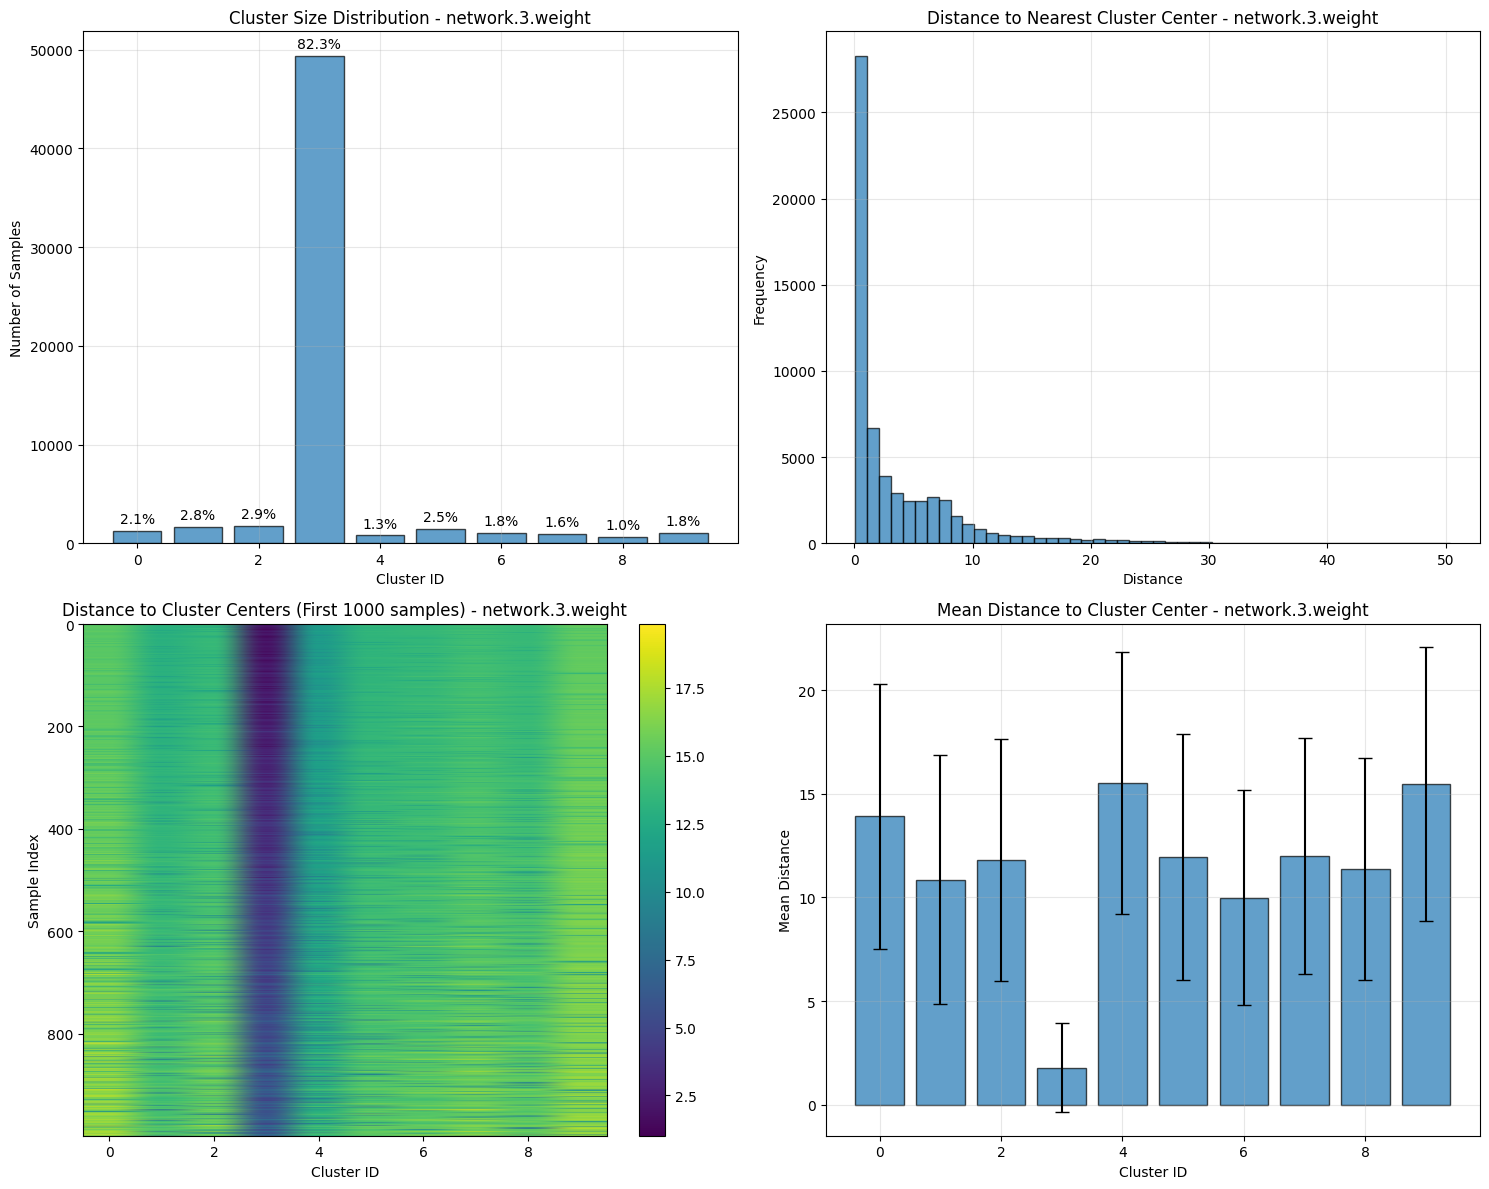

In [31]:
# Import the k-means clustering utilities
from k_means import kmeans_gradients, plot_clustering_results, analyze_cluster_characteristics, find_optimal_clusters

# Check if we have loaded gradients
if 'stacked_gradients' in locals() and stacked_gradients:
    print("🔍 GPU-Accelerated K-means Clustering Analysis")
    print("=" * 50)
    
    # Pick a parameter to analyze (you can change this)
    param_name = list(stacked_gradients.keys())[2]
    gradients_tensor = stacked_gradients[param_name]

    print(f"Analyzing parameter: {param_name}")
    print(f"Gradient tensor shape: {gradients_tensor.shape}")
    
    # Perform k-means clustering (with progress bar)
    n_clusters = 10
    print(f"\n2. Performing GPU-accelerated k-means clustering with {n_clusters} clusters...")
    clustering_results = kmeans_gradients(
        gradients_tensor.cuda(), 
        n_clusters=n_clusters,
        use_gpu=True,
        max_iter=1000,
        n_init=1,
        init_method="random",
        start_fraction=0.2,
        end_fraction=1,
        min_grad_percentile=0.5
        )
    
    # Plot comprehensive results
    print(f"\n3. Plotting clustering results...")
    plot_clustering_results(clustering_results, param_name)

param_name network.3.weight


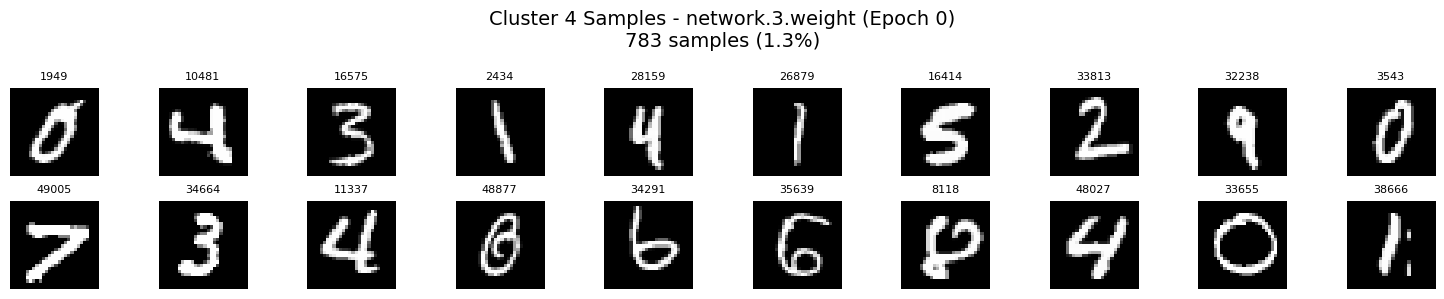


Cluster 4 Statistics for network.3.weight (Epoch 0):
  Size: 783 samples (1.3%)
  Sample indices: [1949, 10481, 16575, 2434, 28159, 26879, 16414, 33813, 32238, 3543, 49005, 34664, 11337, 48877, 34291, 35639, 8118, 48027, 33655, 38666]


In [42]:
# Import the visualization utilities
from cluster_visualization import visualize_cluster_samples, visualize_cluster_centers, analyze_cluster_diversity, visualize_specific_cluster

print("param_name", param_name)

# Example usage - replace with your actual clustering results
epoch = 0  # Images are saved for epoch 0

c=4
visualize_specific_cluster(clustering_results, param_name, epoch, num_samples=20, cluster_id=c)

In [249]:
# Import t-SNE visualization function
from cluster_visualization import visualize_tsne_gradients

# Create t-SNE visualization using the clustering results from above
print("🎨 Creating t-SNE Visualization")
print("=" * 40)

# Use the same parameter and clustering results from Cell 2
print(f"Creating t-SNE visualization for: {param_name}")
print(f"Using clustering results with {clustering_results['n_clusters']} clusters")

# Create the t-SNE visualization
# This will create three plots: true labels, cluster assignments, and model predictions
visualize_tsne_gradients(
    clustering_results=clustering_results,
    param_name=param_name,
    epoch=EPOCH_TO_LOAD,
    data_dir=GRADIENTS_DIR,
    n_samples=5000,  # Use 5000 samples for good performance
    perplexity=30,   # Good default for t-SNE
    random_state=42, # For reproducibility
    figsize=(20, 6)  # Wide figure to show all three plots
)

print("\n✅ t-SNE visualization completed!")
print("The visualization shows:")
print("  - Left: Points colored by true MNIST digit labels")
print("  - Middle: Points colored by k-means cluster assignments") 
print("  - Right: Points colored by model predictions")
print("\nNote: If true labels or predictions are missing, cluster labels will be used as fallback.")

tensor([11.9102,  8.6888, 20.4597, 11.9479, 12.6480, 12.9960, 11.5662, 11.4558,
        11.8972,  9.5539])